In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score


plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),
})

In [2]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [3]:
def model(X, W, b):
    Z = X.dot(W) + b
    # print(Z.min())
    A = 1 / (1 + np.exp(-Z))
    return A

In [4]:
def log_loss(A, y):
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [5]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [6]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [7]:
def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

In [8]:
from tqdm import tqdm

In [28]:
def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X_train)

    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []

    for i in tqdm(range(n_iter)):
        A = model(X_train, W, b)

        if i %10 == 0:
            # Train
            train_loss.append(log_loss(A, y_train))
            y_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))

            # Test
            A_test = model(X_test, W, b)
            test_loss.append(log_loss(A_test, y_test))
            y_pred = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred))

        # mise a jour
        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='test loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.plot(test_acc, label='test acc')
    plt.legend()
    plt.show()

    return (W, b)
       

In [ ]:
################DATASET###################

dimensions de X: (100, 2)
dimensions de y: (100, 1)


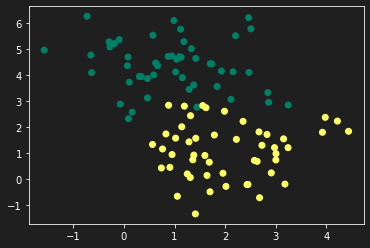

In [10]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

In [ ]:
####Application Chat vs Chien####

In [14]:
from utilities import *

In [15]:
X_train, y_train, X_test, y_test = load_data()

In [16]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500], dtype=int64))


In [17]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100], dtype=int64))


C:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


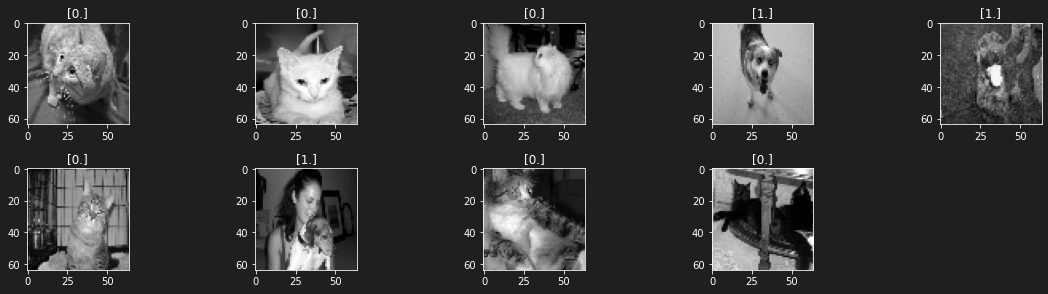

In [18]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [19]:
####Entrainement du Modele####

In [21]:
X_train_reshape = X_train.reshape(X_train.shape[0], -1) / X_train.max()
X_train_reshape.shape

(1000, 4096)

In [23]:
X_test_reshape = X_test.reshape(X_test.shape[0], -1) / X_train.max()
X_test_reshape.shape

(200, 4096)

  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
  0%|                                                                               | 11/10000 [00:00<03:35, 46.40it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
  0%|▏                                                                              | 17/10000 [00:00<03:25, 48.50it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow enco

C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
  3%|██▏                                                                           | 280/10000 [00:06<03:23, 47.75it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
  3%|██▎                                                                           | 290/10000 [00:06<03:28, 46.54it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
  3%|██▎                                                                     

  5%|███▋                                                                          | 471/10000 [00:10<03:28, 45.66it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
  5%|███▋                                                                          | 477/10000 [00:10<03:20, 47.59it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
  5%|███▊                                                                          | 487/10000 [00:10<03:20, 47.39it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow enco

  7%|█████▏                                                                        | 668/10000 [00:14<03:05, 50.27it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
  7%|█████▎                                                                        | 680/10000 [00:14<03:04, 50.64it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
  7%|█████▎                                                                        | 686/10000 [00:15<03:04, 50.35it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow enco

  9%|██████▊                                                                       | 879/10000 [00:19<03:10, 47.87it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
  9%|██████▉                                                                       | 890/10000 [00:19<03:03, 49.57it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
  9%|██████▉                                                                       | 895/10000 [00:20<03:11, 47.61it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow enco

 11%|████████▎                                                                    | 1079/10000 [00:24<03:08, 47.33it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 11%|████████▍                                                                    | 1089/10000 [00:24<03:14, 45.81it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 11%|████████▍                                                                    | 1100/10000 [00:24<03:13, 46.05it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow enco

 13%|█████████▊                                                                   | 1275/10000 [00:28<03:02, 47.90it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 13%|█████████▊                                                                   | 1281/10000 [00:28<03:01, 47.92it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 13%|█████████▉                                                                   | 1287/10000 [00:28<02:57, 49.00it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 13%|█████████▉                                                                   | 1298/10000 

C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 15%|███████████▍                                                                 | 1480/10000 [00:32<03:06, 45.78it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 15%|███████████▍                                                                 | 1490/10000 [00:32<03:15, 43.62it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 15%|███████████▌                                                            

 17%|████████████▊                                                                | 1671/10000 [00:36<02:55, 47.49it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 17%|████████████▉                                                                | 1677/10000 [00:36<02:49, 49.18it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 17%|████████████▉                                                                | 1688/10000 [00:37<02:51, 48.60it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow enco

 19%|██████████████▍                                                              | 1868/10000 [00:41<02:56, 46.12it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 19%|██████████████▍                                                              | 1878/10000 [00:41<02:59, 45.18it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 19%|██████████████▌                                                              | 1889/10000 [00:41<02:55, 46.28it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow enco

C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 21%|███████████████▉                                                             | 2068/10000 [00:45<02:41, 49.20it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 21%|████████████████                                                             | 2079/10000 [00:45<02:40, 49.47it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 21%|████████████████                                                        

 23%|█████████████████▍                                                           | 2258/10000 [00:49<02:42, 47.62it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 23%|█████████████████▍                                                           | 2268/10000 [00:50<02:50, 45.43it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 23%|█████████████████▌                                                           | 2278/10000 [00:50<02:46, 46.46it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow enco

 25%|██████████████████▉                                                          | 2458/10000 [00:54<02:43, 46.16it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 25%|███████████████████                                                          | 2469/10000 [00:54<02:37, 47.83it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 25%|███████████████████                                                          | 2480/10000 [00:54<02:34, 48.77it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow enco

 27%|████████████████████▍                                                        | 2658/10000 [00:58<02:42, 45.26it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 27%|████████████████████▌                                                        | 2669/10000 [00:58<02:32, 48.12it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 27%|████████████████████▋                                                        | 2680/10000 [00:59<02:30, 48.55it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow enco

 29%|██████████████████████                                                       | 2860/10000 [01:02<02:30, 47.46it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 29%|██████████████████████                                                       | 2865/10000 [01:02<02:32, 46.74it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 29%|██████████████████████                                                       | 2871/10000 [01:03<02:32, 46.69it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 29%|██████████████████████▏                                                      | 2877/10000 

 30%|███████████████████████▍                                                     | 3049/10000 [01:06<02:20, 49.61it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 31%|███████████████████████▌                                                     | 3060/10000 [01:06<02:18, 50.20it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 31%|███████████████████████▌                                                     | 3066/10000 [01:07<02:22, 48.54it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow enco

 32%|█████████████████████████                                                    | 3250/10000 [01:10<02:21, 47.67it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 33%|█████████████████████████                                                    | 3256/10000 [01:11<02:19, 48.39it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 33%|█████████████████████████                                                    | 3261/10000 [01:11<02:23, 46.99it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 33%|█████████████████████████▏                                                   | 3267/10000 

 34%|██████████████████████████▌                                                  | 3448/10000 [01:15<02:17, 47.53it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 35%|██████████████████████████▋                                                  | 3459/10000 [01:15<02:14, 48.64it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 35%|██████████████████████████▋                                                  | 3470/10000 [01:15<02:11, 49.81it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow enco

C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 36%|████████████████████████████                                                 | 3645/10000 [01:19<02:12, 47.84it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 37%|████████████████████████████                                                 | 3651/10000 [01:19<02:14, 47.29it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 37%|████████████████████████████▏                                                | 3657/10000 [01:19<02:08, 49.41it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow enco

 38%|█████████████████████████████▌                                               | 3840/10000 [01:23<02:08, 47.92it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 38%|█████████████████████████████▌                                               | 3845/10000 [01:23<02:11, 46.89it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 39%|█████████████████████████████▋                                               | 3851/10000 [01:23<02:09, 47.58it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 39%|█████████████████████████████▋                                               | 3857/10000 

 40%|███████████████████████████████                                              | 4038/10000 [01:27<01:58, 50.10it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 40%|███████████████████████████████▏                                             | 4050/10000 [01:27<01:57, 50.43it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 41%|███████████████████████████████▏                                             | 4056/10000 [01:27<02:01, 48.88it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow enco

C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 42%|████████████████████████████████▌                                            | 4237/10000 [01:31<02:10, 44.19it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 42%|████████████████████████████████▋                                            | 4247/10000 [01:31<02:18, 41.54it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 43%|████████████████████████████████▊                                       

 44%|██████████████████████████████████                                           | 4428/10000 [01:36<01:56, 47.90it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 44%|██████████████████████████████████▏                                          | 4439/10000 [01:36<01:53, 49.20it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 44%|██████████████████████████████████▎                                          | 4449/10000 [01:36<02:07, 43.57it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow enco

 46%|███████████████████████████████████▋                                         | 4628/10000 [01:40<02:07, 42.05it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 46%|███████████████████████████████████▋                                         | 4638/10000 [01:40<02:12, 40.42it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 46%|███████████████████████████████████▊                                         | 4649/10000 [01:40<02:05, 42.56it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow enco

 48%|█████████████████████████████████████                                        | 4807/10000 [01:44<01:54, 45.32it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 48%|█████████████████████████████████████                                        | 4818/10000 [01:44<01:49, 47.41it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 48%|█████████████████████████████████████▏                                       | 4829/10000 [01:44<01:46, 48.67it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow enco

C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 50%|██████████████████████████████████████▌                                      | 5006/10000 [01:48<01:45, 47.33it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 50%|██████████████████████████████████████▌                                      | 5011/10000 [01:48<01:46, 46.67it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 50%|██████████████████████████████████████▌                                      | 5016/10000 [01:48<01:45, 47.27it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 50%|██████████████████████████████████████▋                                      | 5021/10000 

 52%|████████████████████████████████████████                                     | 5198/10000 [01:52<01:38, 48.85it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 52%|████████████████████████████████████████                                     | 5208/10000 [01:52<01:41, 47.04it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 52%|████████████████████████████████████████▏                                    | 5219/10000 [01:52<01:39, 48.14it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow enco

 54%|█████████████████████████████████████████▌                                   | 5391/10000 [01:56<01:34, 48.95it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 54%|█████████████████████████████████████████▌                                   | 5397/10000 [01:56<01:32, 49.72it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 54%|█████████████████████████████████████████▋                                   | 5408/10000 [01:56<01:33, 49.11it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow enco

 56%|███████████████████████████████████████████                                  | 5589/10000 [02:00<01:27, 50.35it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 56%|███████████████████████████████████████████                                  | 5595/10000 [02:00<01:30, 48.83it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 56%|███████████████████████████████████████████▏                                 | 5601/10000 [02:00<01:31, 47.93it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 56%|███████████████████████████████████████████▏                                 | 5606/10000 

 58%|████████████████████████████████████████████▍                                | 5777/10000 [02:04<01:25, 49.37it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 58%|████████████████████████████████████████████▌                                | 5787/10000 [02:04<01:32, 45.71it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 58%|████████████████████████████████████████████▋                                | 5798/10000 [02:04<01:26, 48.32it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow enco

C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 60%|██████████████████████████████████████████████                               | 5978/10000 [02:08<01:21, 49.07it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 60%|██████████████████████████████████████████████                               | 5989/10000 [02:08<01:20, 49.94it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 60%|██████████████████████████████████████████████▏                         

 62%|███████████████████████████████████████████████▍                             | 6167/10000 [02:12<01:19, 48.43it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 62%|███████████████████████████████████████████████▌                             | 6178/10000 [02:12<01:17, 49.45it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 62%|███████████████████████████████████████████████▋                             | 6189/10000 [02:13<01:16, 49.65it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow enco

C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 64%|█████████████████████████████████████████████████                            | 6365/10000 [02:16<01:16, 47.61it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 64%|█████████████████████████████████████████████████                            | 6371/10000 [02:16<01:16, 47.28it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 64%|█████████████████████████████████████████████████                            | 6377/10000 [02:16<01:13, 49.09it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow enco

 66%|██████████████████████████████████████████████████▌                          | 6560/10000 [02:20<01:09, 49.56it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 66%|██████████████████████████████████████████████████▌                          | 6565/10000 [02:20<01:11, 47.94it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 66%|██████████████████████████████████████████████████▌                          | 6571/10000 [02:21<01:11, 47.91it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 66%|██████████████████████████████████████████████████▋                          | 6576/10000 

 68%|███████████████████████████████████████████████████▉                         | 6751/10000 [02:24<01:07, 47.86it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 68%|████████████████████████████████████████████████████                         | 6757/10000 [02:24<01:05, 49.16it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 68%|████████████████████████████████████████████████████                         | 6768/10000 [02:25<01:05, 49.59it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow enco

 69%|█████████████████████████████████████████████████████▍                       | 6947/10000 [02:28<01:04, 47.26it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 70%|█████████████████████████████████████████████████████▌                       | 6958/10000 [02:28<01:02, 48.84it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 70%|█████████████████████████████████████████████████████▋                       | 6969/10000 [02:29<01:01, 48.91it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow enco

 71%|██████████████████████████████████████████████████████▉                      | 7141/10000 [02:32<00:59, 48.09it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 71%|███████████████████████████████████████████████████████                      | 7146/10000 [02:32<01:04, 44.07it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 72%|███████████████████████████████████████████████████████                      | 7151/10000 [02:33<01:04, 44.24it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 72%|███████████████████████████████████████████████████████                      | 7157/10000 [02:33<01:01, 46.43it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A

 73%|████████████████████████████████████████████████████████▌                    | 7340/10000 [02:36<00:52, 50.50it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 73%|████████████████████████████████████████████████████████▌                    | 7346/10000 [02:37<00:55, 48.10it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 74%|████████████████████████████████████████████████████████▌                    | 7351/10000 [02:37<00:55, 47.69it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 74%|████████████████████████████████████████████████████████▋                    | 7357/10000 

 75%|██████████████████████████████████████████████████████████                   | 7539/10000 [02:40<00:50, 49.07it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 76%|██████████████████████████████████████████████████████████▏                  | 7550/10000 [02:41<00:49, 49.50it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 76%|██████████████████████████████████████████████████████████▏                  | 7555/10000 [02:41<00:51, 47.78it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow enco

 77%|███████████████████████████████████████████████████████████▌                 | 7728/10000 [02:44<00:46, 49.39it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 77%|███████████████████████████████████████████████████████████▌                 | 7739/10000 [02:45<00:46, 48.77it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 78%|███████████████████████████████████████████████████████████▋                 | 7750/10000 [02:45<00:46, 48.67it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow enco

C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 79%|█████████████████████████████████████████████████████████████                | 7928/10000 [02:49<00:42, 49.31it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 79%|█████████████████████████████████████████████████████████████▏               | 7939/10000 [02:49<00:41, 49.39it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 80%|█████████████████████████████████████████████████████████████▏          

 81%|██████████████████████████████████████████████████████████████▌              | 8117/10000 [02:53<00:38, 48.56it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 81%|██████████████████████████████████████████████████████████████▌              | 8128/10000 [02:53<00:38, 48.75it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 81%|██████████████████████████████████████████████████████████████▋              | 8139/10000 [02:53<00:37, 49.29it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow enco

C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 83%|████████████████████████████████████████████████████████████████             | 8318/10000 [02:57<00:34, 49.35it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 83%|████████████████████████████████████████████████████████████████▏            | 8329/10000 [02:57<00:33, 50.21it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 83%|████████████████████████████████████████████████████████████████▏       

 85%|█████████████████████████████████████████████████████████████████▍           | 8495/10000 [03:00<00:31, 47.23it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 85%|█████████████████████████████████████████████████████████████████▍           | 8501/10000 [03:01<00:31, 46.99it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 85%|█████████████████████████████████████████████████████████████████▍           | 8506/10000 [03:01<00:32, 46.03it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 85%|█████████████████████████████████████████████████████████████████▌           | 8511/10000 [03:01<00:35, 41.96it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A

 87%|██████████████████████████████████████████████████████████████████▋          | 8656/10000 [03:04<00:32, 40.97it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 87%|██████████████████████████████████████████████████████████████████▋          | 8661/10000 [03:04<00:33, 39.83it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 87%|██████████████████████████████████████████████████████████████████▋          | 8666/10000 [03:05<00:32, 41.09it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 87%|██████████████████████████████████████████████████████████████████▊          | 8671/10000 [03:05<00:32, 40.31it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A

 88%|████████████████████████████████████████████████████████████████████         | 8838/10000 [03:09<00:26, 43.30it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 88%|████████████████████████████████████████████████████████████████████▏        | 8848/10000 [03:09<00:26, 43.07it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 89%|████████████████████████████████████████████████████████████████████▏        | 8858/10000 [03:09<00:26, 42.37it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow enco

 90%|█████████████████████████████████████████████████████████████████████▌       | 9037/10000 [03:13<00:20, 47.81it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 90%|█████████████████████████████████████████████████████████████████████▋       | 9048/10000 [03:13<00:20, 47.52it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 91%|█████████████████████████████████████████████████████████████████████▊       | 9059/10000 [03:14<00:20, 46.38it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow enco

 92%|███████████████████████████████████████████████████████████████████████▏     | 9249/10000 [03:18<00:17, 43.75it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 93%|███████████████████████████████████████████████████████████████████████▎     | 9259/10000 [03:18<00:17, 42.65it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 93%|███████████████████████████████████████████████████████████████████████▎     | 9269/10000 [03:18<00:17, 42.23it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow enco

 95%|████████████████████████████████████████████████████████████████████████▊    | 9455/10000 [03:23<00:12, 43.51it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 95%|████████████████████████████████████████████████████████████████████████▊    | 9461/10000 [03:23<00:12, 44.72it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 95%|████████████████████████████████████████████████████████████████████████▉    | 9466/10000 [03:23<00:12, 44.16it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 95%|████████████████████████████████████████████████████████████████████████▉    | 9471/10000 [03:23<00:12, 42.36it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A

 96%|██████████████████████████████████████████████████████████████████████████▏  | 9639/10000 [03:27<00:08, 44.14it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 96%|██████████████████████████████████████████████████████████████████████████▎  | 9650/10000 [03:27<00:07, 46.01it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 97%|██████████████████████████████████████████████████████████████████████████▎  | 9655/10000 [03:27<00:07, 46.04it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow enco

 98%|███████████████████████████████████████████████████████████████████████████▍ | 9801/10000 [03:31<00:04, 40.23it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 98%|███████████████████████████████████████████████████████████████████████████▌ | 9806/10000 [03:31<00:04, 41.28it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 98%|███████████████████████████████████████████████████████████████████████████▌ | 9811/10000 [03:31<00:04, 40.19it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
 98%|███████████████████████████████████████████████████████████████████████████▌ | 9816/10000 [03:31<00:04, 41.15it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A

100%|████████████████████████████████████████████████████████████████████████████▊| 9968/10000 [03:35<00:00, 48.32it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
100%|████████████████████████████████████████████████████████████████████████████▊| 9978/10000 [03:35<00:00, 40.99it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
100%|████████████████████████████████████████████████████████████████████████████▉| 9989/10000 [03:36<00:00, 45.01it/s]C:\Users\victo\AppData\Local\Temp/ipykernel_9448/3631861369.py:4: RuntimeWarning: overflow enco

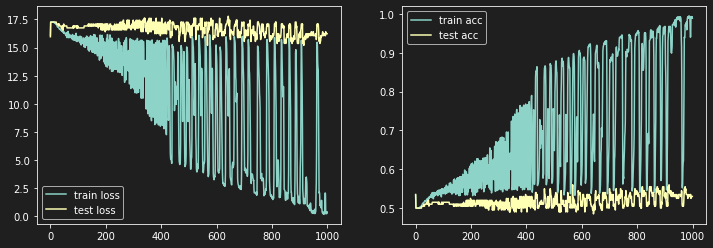

In [29]:
W, b = artificial_neuron(X_train_reshape, y_train, X_test_reshape, y_test, learning_rate = 0.01, n_iter=10000)

In [30]:
####Experience sur la Normalisation####

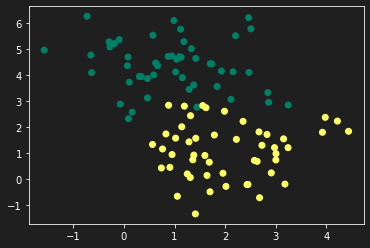

In [31]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
X[:, 1] = X[:, 1] * 1

y = y.reshape(y.shape[0], 1)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

In [33]:
def artificial_neuron_2(X, y, learning_rate=0.1, n_iter=1000):

  W, b = initialisation(X)
  W[0], W[1] = -7.5, 7.5

  nb = 1
  j=0
  history = np.zeros((n_iter // nb, 5))

  A = model(X, W, b)
  Loss = []
  

  Params1 = [W[0]]
  Params2 = [W[1]]
  Loss.append(log_loss(y, A))
  
  # Training
  for i in range(n_iter):
    A = model(X, W, b)
    Loss.append(log_loss(y, A))
    Params1.append(W[0])
    Params2.append(W[1])
    dW, db = gradients(A, X, y)
    W, b = update(dW, db, W, b, learning_rate = learning_rate)

    if (i % nb == 0):  
      history[j, 0] = W[0]
      history[j, 1] = W[1]
      history[j, 2] = b
      history[j, 3] = i
      history[j, 4] = log_loss(y, A)
      j +=1

  plt.plot(Loss)
  plt.show()

  return history, b, Loss, Params1, Params2

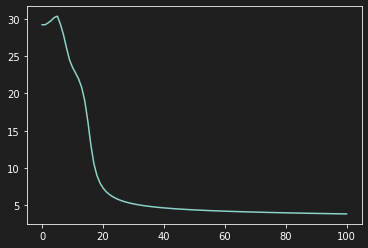

In [34]:
history, b, Loss, Params1, Params2 = artificial_neuron_2(X, y, learning_rate=0.6, n_iter=100)

In [35]:
lim = 15
h = 100
W1 = np.linspace(-lim, lim, h)
W2 = np.linspace(-lim, lim, h)

W11, W22 = np.meshgrid(W1, W2)

W_final = np.c_[W11.ravel(), W22.ravel()].T
W_final.shape

(2, 10000)

In [36]:
Z = X.dot(W_final) + b
A = 1 / (1 + np.exp(-Z))

epsilon = 1e-15
L = 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon), axis=0).reshape(W11.shape)
L.shape

(100, 100)

In [37]:
from matplotlib.animation import FuncAnimation

In [38]:
def animate(params):
  W0 = params[0]
  W1 = params[1]
  b = params[2]
  i = params[3]
  loss = params[4]
  

  # ax[0].clear() # frontiere de décision
  # ax[1].clear() # sigmoide
  # ax[2].clear() # fonction Cout
  
  ax[0].contourf(W11, W22, L, 20, cmap='magma', zorder=-1)
  ax[0].scatter(Params1[int(i)], Params2[int(i)], c='r', marker='x', s=50, zorder=1)
  ax[0].plot(Params1[0:int(i)], Params2[0:int(i)], lw=3, c='r', zorder=1)

  ax[1].plot(Loss[0:int(i)], lw=3, c='white')
  ax[1].set_xlim(0, len(Params1))

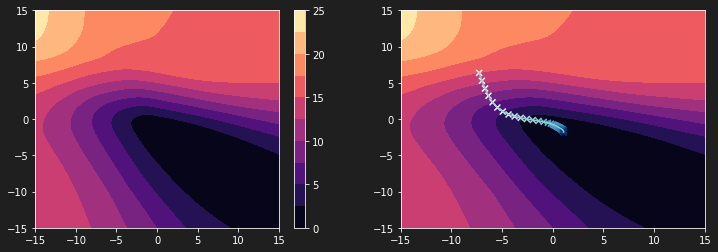

In [39]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.contourf(W11, W22, L, 10, cmap='magma')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.contourf(W11, W22, L, 10, cmap='magma')
plt.scatter(history[:, 0], history[:, 1], c=history[:, 2], cmap='Blues', marker='x')
plt.plot(history[:, 0], history[:, 1])
# plt.plot(history[:, 0], history[:, 1], c='r')
# plt.colorbar()

C:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\animation.py:889: UserWarning:

Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.



RuntimeError: Requested MovieWriter (ffmpeg) not available

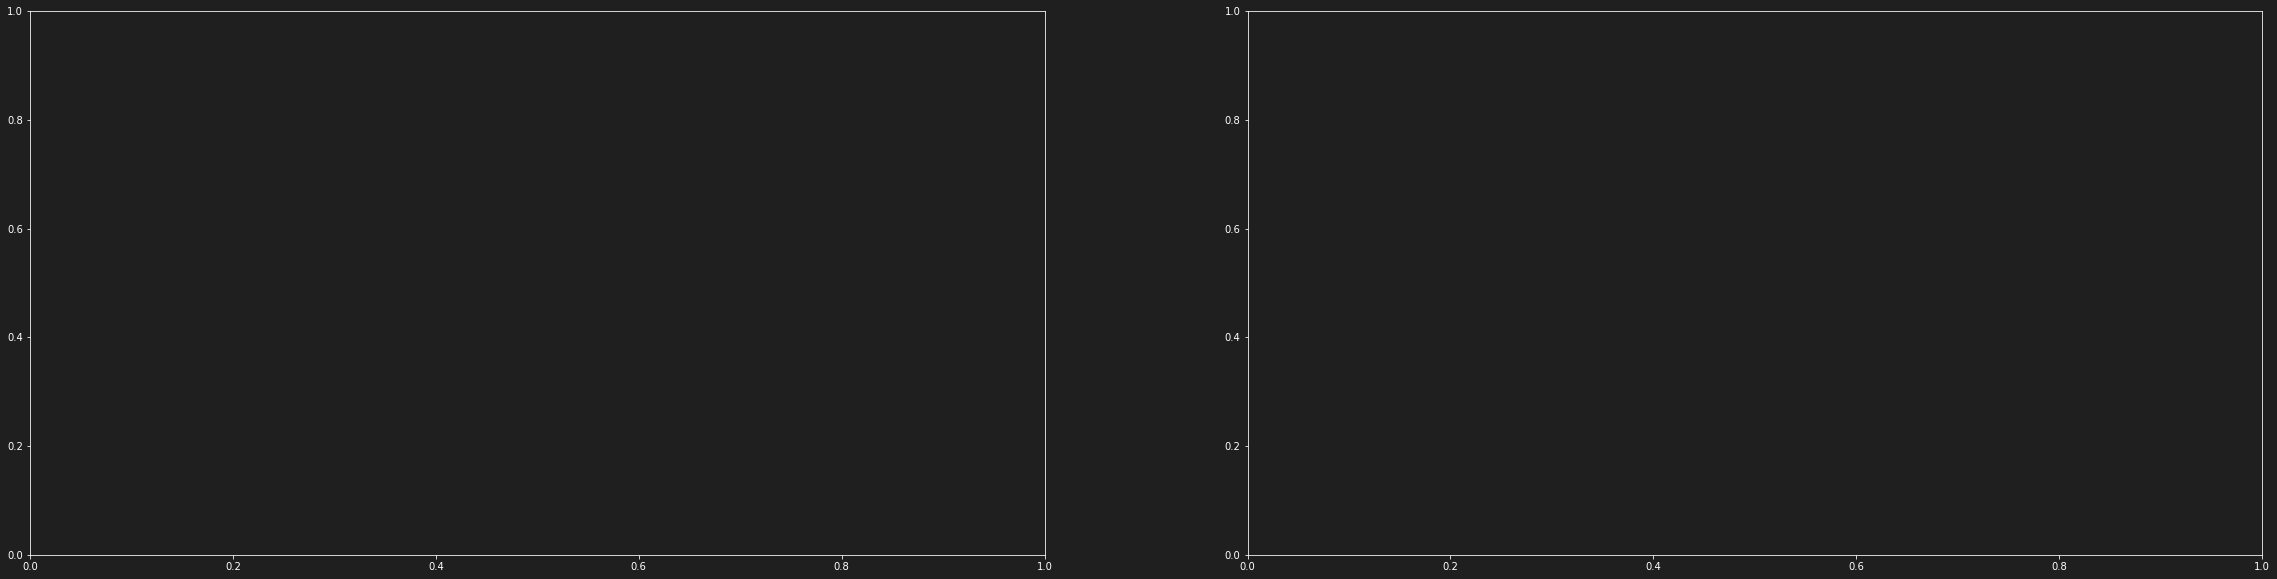

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(40, 10))
ani = FuncAnimation(fig, animate, frames=history, interval=10, repeat=False)

import matplotlib.animation as animation
Writer = animation.writers['ffmpeg']
writer = Writer(fps=10, metadata=dict(artist='Me'), bitrate=3200)
ani.save('animation3.mp4', writer=writer)

In [44]:
import plotly.graph_objects as go

fig = (go.Figure(data=[go.Surface(z=L, x=W11, y=W22, opacity = 1)]))

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()